**Tutorial_3_Assignment**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline
%precision %.2f

'%.2f'

**Question 1** Calculate the diameter of a discrete particle whose terminal settling velocity is 1.044 cm/s. The specific particle density is 2.65 and the water temperature is 12$^o$C. Assume Stokes’s law applies and that the density of water is 1,000 kg/m$^3$ 

In [6]:
v_s = 1.044 # cm/s
G = 2.65 
nu = 1.66 * 10**-6 # m2/s assumed
g = 9.81 # m/s2
v_sm = v_s/100 # m/s

d = np.sqrt(v_sm*nu/(g/18* (G-1)));
dp = round(d*10**3,2) #cm; 
print("The required particle size is",dp, "cm") 

The required particle size is 0.14 cm


**Question 2.** Design a horizontal flow rectangular sedimentation basin for a maximum day design flow rate of 25,000 m$^3$/d. Assume an overflow rate of 40 m$^3$/d/m$^2$ and a water temperature of 12$^o$C

In [3]:
Qd = 25000 # m3/d
f_r = 40 # m3/d/m2
A_T = Qd/f_r# m2
print("Area is ", A_T, "m^2")
print("Assume that Width = 12 m") 
W = 12 #m
L = round(A_T/W,2)
L
print("The length of the tank is", L, "m") 

Area is  625.0 m^2
Assume that Width = 12 m
The length of the tank is 52.08 m


Assume that height is 4 m, and we provide 0.5 m overboard and 0.5 m space for bottom sludge.
The design dimension is then 52.08 m $\times$ 12 m $\times$ 5 m.

**Question 3**. A plant treating 189.25 MLD of water is using 50 mg/L of alum, Al$_2$(SO$_4$4)$_3$ 14 H$_2$O as a coagulant. The water contains a natural alkalinity of 30 mg/L as 3Ca(HCO$_3$)$_2$. Compute the amount of lime as CaO required per day.


**HINT**: Al$_2$(SO$_4$)$_3.14$H$_2$O + 3Ca(HCO$_3$)$_2$ -> 2Al(OH)$_3$ + 3 CaSO$_4$ +14 H$_2$O + 6H$_2$O


In [4]:
MW_alu = 2 * 27 + 3 * 32 + 12 * 16 + 14 * 18 # kg/kmol
MW_alk = 40 + 2 * 1 + 2 * 12 + 6 * 16 # kg/kmol
W_alu = 189.25 *10**6 *50/10**6 # kg
W_alk = 189.25 *10**6 *30/10**6 # kg
print("Molecular weight Alum is", MW_alu,"kg/kmol and available Alkalinity is",MW_alk, "kg/kmol")
print("The available Alum is", W_alu,"kg and available Alkalinity is",W_alk, "kg")

Molecular weight Alum is 594 kg/kmol and available Alkalinity is 162 kg/kmol
The available Alum is 9462.5 kg and available Alkalinity is 5677.5 kg


1 kmol of Alum requires 3 kmol of Alkalinity, i.e,

594 kg Alum required 3 $\times$ 162 kg Alkalinity

1 kg Alum will require 3 $\times$ 162/594 kg Alkalinity

9462.5 kg Alum will require 3 $\times$ 162/594 $\times$  9462.5 kg Alkalinity



In [5]:
Alk_req = round(3 *162/594*9462.5,2) 
print("The amount of required alkalinity is", Alk_req) 

The amount of required alkalinity is 7742.05


Since required alkalinity is 7742.05 and available is 5677.5, we need to add 

In [1]:
Add_alk = Alk_req -W_alk
print("The additional required alkalinity is", Add_alk, "kg")
unused_alu = round((MW_alu/(3*MW_alk)*Add_alk),2)
print("The unused alum = ", unused_alu, "kg")  

NameError: name 'Alk_req' is not defined

Since CaO is required, we need to work on the following 2 equations

Al$_2$(SO$_4)_3$.14H$_2$O + 3Ca(OH)$_2$ -> 2Al(OH)$_3$ + 3 CaSO$_4$ +14 H$_2$O + 6H$_2$O

CaO + H2O -> Ca(OH)$_2$

In [7]:
MW_caoh = 40 +2 *16 +2*1;
print("Molecular wt of Ca(OH)2 is", MW_caoh, "kg/kmol")

Molecular wt of Ca(OH)2 is 74 kg/kmol


1 kmol of Alum requires 3 kmol of Ca(OH)$_2$, i.e,

594 kg Alum required 3 $\times$ 72 kg Ca(OH)$_2$

1 kg Alum will require 3 $\times$ 72/594 kg Ca(OH)$_2$

2523 kg Alum will require 3 $\times$ 72/594 $\times$  2523 Ca(OH)$_2$

In [8]:
req_caoh = round((3*MW_caoh/MW_alu)*unused_alu)
print("The required Ca(OH)2 is ", req_caoh, "kg")   

The required Ca(OH)2 is  943 kg


From the last equation above, 1 kmol of CaO will produce one mole of Ca(OH)$_2$. So, 943 kg of Ca(OH)2 will reqiure can be produced from

In [9]:
MW_cao = 40+16
CaO_r = round(MW_cao/MW_caoh*943) 
print("The required CaO is ", CaO_r, "kg") 

The required CaO is  714 kg


**Question 4.**  A circular sedimentation tank is to handle 8 MLD of raw water. If the detention period is 4 hours, and the depth of the tank is 4.2 m, what should the diameter of tank be?

In [10]:
h = 4.2 #m
W_d = 8 *10**6 # L/D
R_t = 4 # h
V_r = round(W_d*R_t/24*1/1000,2) # m^3
print("The required volume is", V_r, "m^3" ) 

The required volume is 1333.33 m^3


Volume and diameter relation in a circular tank is: $V = d^2(0.011\cdot d + 0.785\cdot H)$.

To solve for $d$ trial and error method has to be adopted. So first we plot the function.

(None,
 <matplotlib.text.Text at 0x7f3e9161cb38>)

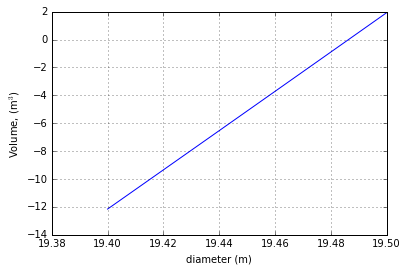

In [11]:
dia = np.linspace(19.4,19.5,100)
V = dia**2*(0.011*dia+0.785*h)-V_r 
plt.plot(dia,V)    
plt.grid(), plt.ylabel("Volume, (m$^3$)"), plt.xlabel("diameter (m)")  

In [14]:
d = sp.Symbol("d") 
sol1 = sp.solveset((d**2*(0.011*d+0.785*4.2) - 1333.33), d)  
print(" The required diameter is 19.4864 m")
sol1

 The required diameter is 19.4864 m


{-298.365679967734, -20.8479982989666, 19.4864055394277}